# Florence dataset

In [1]:
import sys; sys.path.insert(0,"../")
import numpy as np
%matplotlib notebook

import mview

sys.path.insert(0,"../examples/florence/")
import setup as florence

The following are visualizations for the Florence dataset.

## General stats

The set of families, along with number of times they appear in the data set, is:

In [2]:
families = florence.families
for family, count in zip(families,florence.families_count):
    print(f"{family}({count})", end=", ")

Acciaiuoli(4), Adimari(13), Albizzi(24), Aldobrandini(3), Altoviti(11), Ardinghelli(20), Arnolfi(3), Arrighi(1), Arrigucci(4), Baldovinetti(15), Barbadori(18), Bardi(38), Baroncelli(5), Baronci(2), Bartoli(2), Belfradelli(10), Bencivenni(9), Benizzi(14), Berlinghieri(2), Bischeri(6), Brancacci(7), Bucelli(4), Busini(4), Capponi(5), Carducci(7), Carnesecchi(5), Castellani(23), Cavalcanti(10), Ciai(2), Corbinelli(5), Corsi(3), Da Panzano(2), Da Uzzano(12), Dall'Antella(4), Davanzati(9), Degli Agli(3), Del Forese(3), Del Palagio(3), Della Casa(12), Dietisalvi(7), Doffi(1), Donati(8), Fagni(2), Fioravanti(5), Fortini(2), Frescobaldi(8), Gianfigliazzi(17), Ginori(9), Giugni(8), Guadagni(10), Guasconi(18), Guicciardini(28), Lamberteschi(11), Lapi(1), Mancini(1), Manelli(15), Manovelli(12), Martelli(14), Medici(128), Orlandini(10), Panciatichi(15), Pandolfini(7), Pazzi(8), Pecori(3), Pepi(4), Peruzzi(35), Pitti(3), Raugi(1), Ricasoli(20), Ridolfi(4), Rondinelli(17), Rossi(10), Rucellai(2), Sa

The attribute types, along with the number of times they appear in the data set, is:

In [4]:
attributes = florence.attributes
for attribute, count in zip(attributes,florence.attributes_count):
    print(f"{attribute}({count})", end=", ")

marriage(157), business(58), partnerships(29), bankemployment(14), realestate(12), patronage(44), loan(87), friendship(17), mallevadori(31), 

## 2 attributes: marriage and loan

In [5]:
attributes2 = ['marriage','loan']

We reduce the families to those that have connections in each of the attributes of interest:

In [6]:
families2 = florence.reduce_families(attributes2)
marriage_count = florence.count_occurrences('marriage',families2)
loan_count = florence.count_occurrences('loan',families2)
for family, count1, count2 in zip(families2,marriage_count,loan_count):
    print(f"{family}({count1},{count2})",end=", ")

Adimari(4,3), Ardinghelli(5,10), Arrigucci(1,1), Baldovinetti(2,2), Barbadori(7,6), Bardi(12,4), Belfradelli(1,5), Bencivenni(3,3), Bischeri(2,1), Brancacci(2,1), Busini(1,2), Carducci(1,1), Castellani(8,5), Cavalcanti(3,2), Ciai(1,1), Corbinelli(1,1), Da Uzzano(2,4), Davanzati(2,1), Degli Agli(2,1), Del Forese(1,1), Della Casa(4,2), Donati(1,2), Fioravanti(2,3), Gianfigliazzi(12,1), Ginori(5,4), Giugni(4,1), Guadagni(7,1), Guicciardini(11,4), Lamberteschi(1,7), Manelli(1,2), Manovelli(3,4), Medici(33,25), Orlandini(1,5), Panciatichi(10,1), Pandolfini(2,5), Pazzi(1,3), Pecori(1,1), Peruzzi(11,7), Ricasoli(12,6), Rondinelli(7,2), Rossi(3,3), Salviati(6,5), Scambrilla(1,2), Serragli(1,1), Serristori(1,3), Spini(5,1), Strozzi(23,3), Tornabuoni(4,1), 

We form a similarity graph for each attribute (containing list of edges and corresponding number of appereances).

In [7]:
marriage_edges, marriage_counts = \
florence.similarity_graph('marriage',allowed_families=families2)
marriage_dissimilarities = 1.0/np.array(marriage_counts)

loan_edges, loan_counts = \
florence.similarity_graph('loan',allowed_families=families2)
loan_dissimilarities = 1.0/np.array(loan_counts)

We set up the set of dissimilarities using the DISS class.

In [23]:
func = lambda x : 1.0/x**1

diss = mview.DISS(len(families2),node_labels=families2)
diss.add_graph(edge_list=marriage_edges,dissimilarity_list=marriage_dissimilarities,
              shortest_path=True,weight_function=func,label='marriage')
diss.add_graph(edge_list=loan_edges,dissimilarity_list=loan_dissimilarities,
              shortest_path=True,weight_function=func,label='loan')

# MDS

We first compute separate MDS embedding for each attribute.

mds.MDS():
  dissimilarity stats:
    number of points : 48
    number of edges : 904
    dissimilarity rms : 2.67e+00
  embedding stats:
    dimension : 2
  MDS.initialize( - automatic):
    method : random
    initial stress : 5.43e-01
  MDS.gd():
gd.single(): 
  computation parameters:
    stochastic : False
    constraint : False
    scheme : mm
    initial lr : 0.1
    max_iter : 500
    max_step : 1.00e+10
  progress:
     499/500 : cost = 2.49e-01, grad = 7.73e-04, lr = 1.07e+01, step = 8.27e-03
  results:
    conclusion : maximum number of iterations reached
    total iterations : 499
    final cost : 2.49e-01
    final gradient size : 7.73e-04
    final learning rate : 1.07e+01
    final step size : 8.27e-03
    time : 9.70e+00 [sec]
  final stress : 2.49e-01


<IPython.core.display.Javascript object>


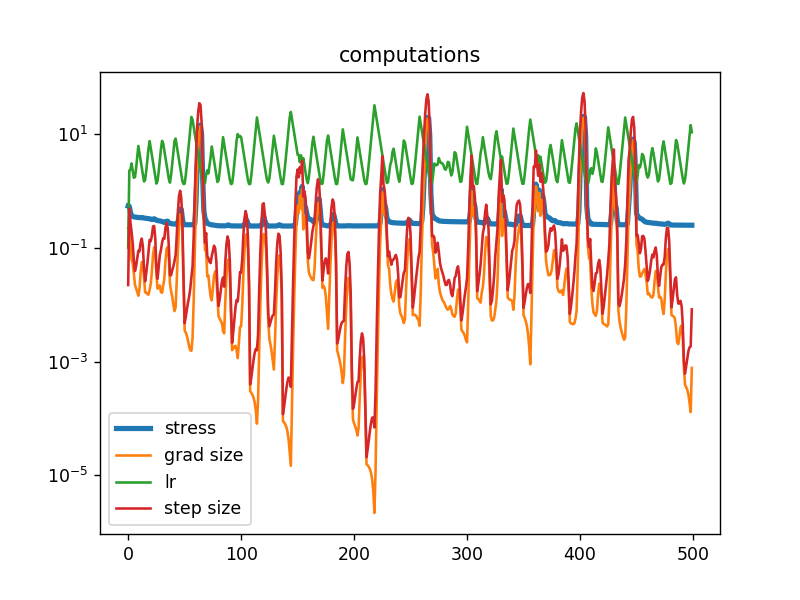

<IPython.core.display.Javascript object>


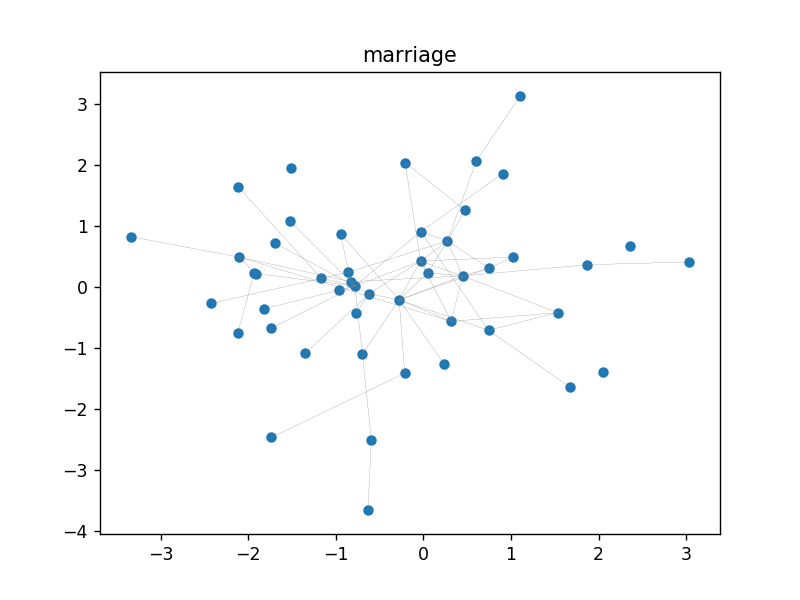

In [29]:
mds1 = mview.MDS(diss.D[0],weighted=False,verbose=2)
mds1.gd(scheme='mm',lr=.1,max_iter=500)
mds1.figureH()
mds1.figureX(edges=marriage_edges,title='marriage')

mds.MDS():
  dissimilarity stats:
    number of points : 48
    number of edges : 1128
    dissimilarity rms : 3.56e+00
  embedding stats:
    dimension : 2
  MDS.initialize( - automatic):
    method : random
    initial stress : 3.43e-01
  MDS.gd():
gd.single(): 
  computation parameters:
    stochastic : False
    constraint : False
    scheme : mm
    initial lr : 0.1
    max_iter : 500
    max_step : 1.00e+10
  progress:
     499/500 : cost = 1.08e-01, grad = 1.24e-11, lr = 3.60e+01, step = 4.46e-10
  results:
    conclusion : maximum number of iterations reached
    total iterations : 499
    final cost : 1.08e-01
    final gradient size : 1.24e-11
    final learning rate : 3.60e+01
    final step size : 4.46e-10
    time : 1.19e+01 [sec]
  final stress : 1.08e-01


<IPython.core.display.Javascript object>


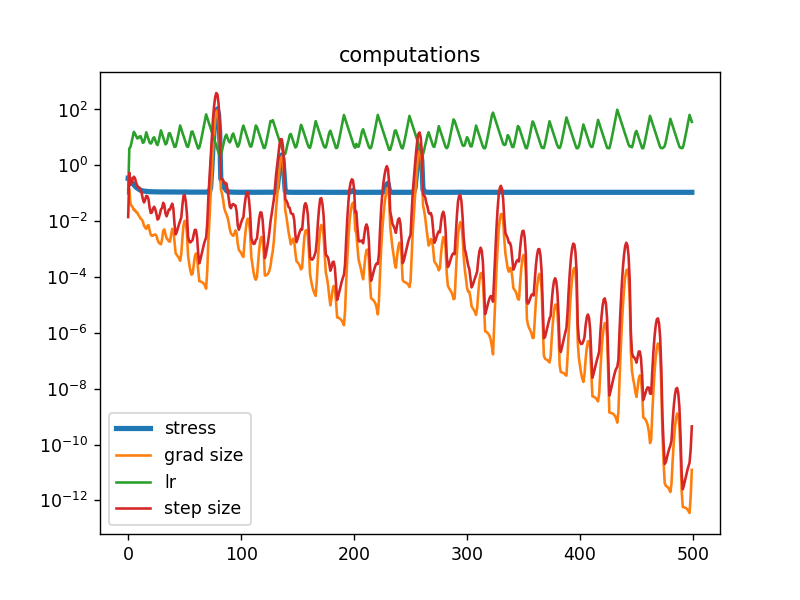

<IPython.core.display.Javascript object>


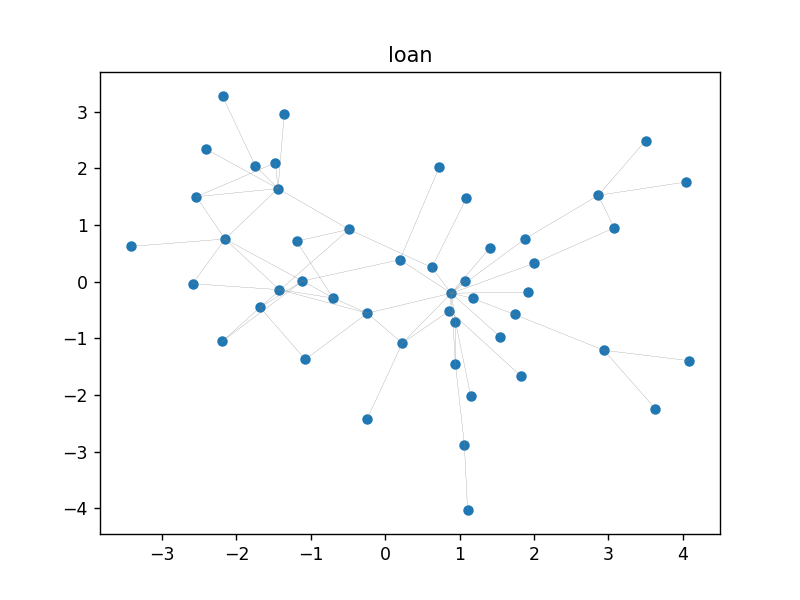

In [28]:
mds2 = mview.MDS(diss.D[1],weighted=True,verbose=2)
mds2.gd(lr=.1,max_iter=500)
mds2.figureH()
mds2.figureX(edges=loan_edges,title='loan')

# MPSE

We can then run the basic algorithm.

In [31]:
mv = mview.mpse.MPSE(diss,weighted=True)
mv.gd(min_grad=1e-4,max_iter=500,verbose=2,lr=0.1,average_neighbors=1)

TypeError: stress_function() got multiple values for keyword argument 'weighted'

<IPython.core.display.Javascript object>


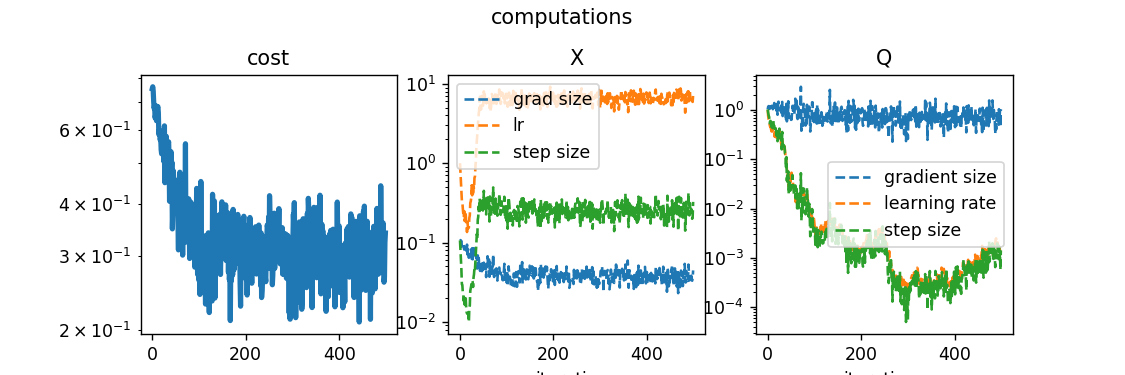

<IPython.core.display.Javascript object>


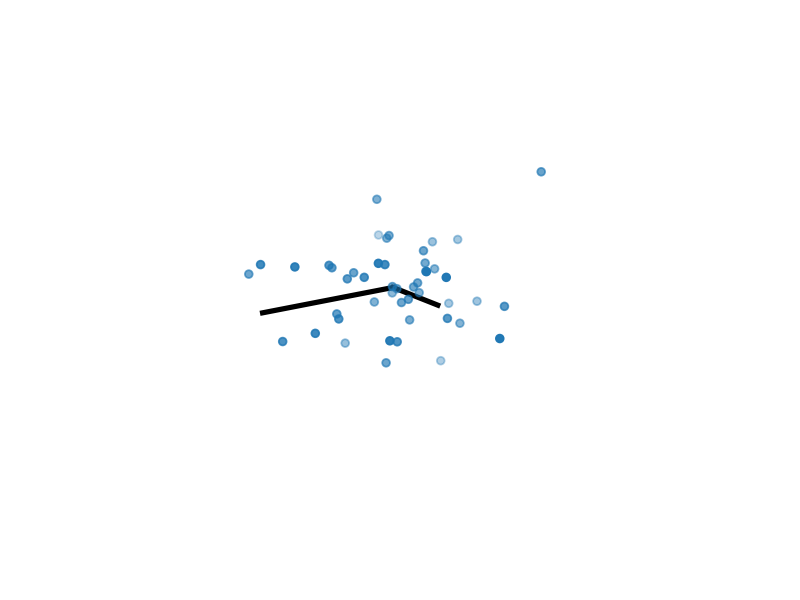

<IPython.core.display.Javascript object>


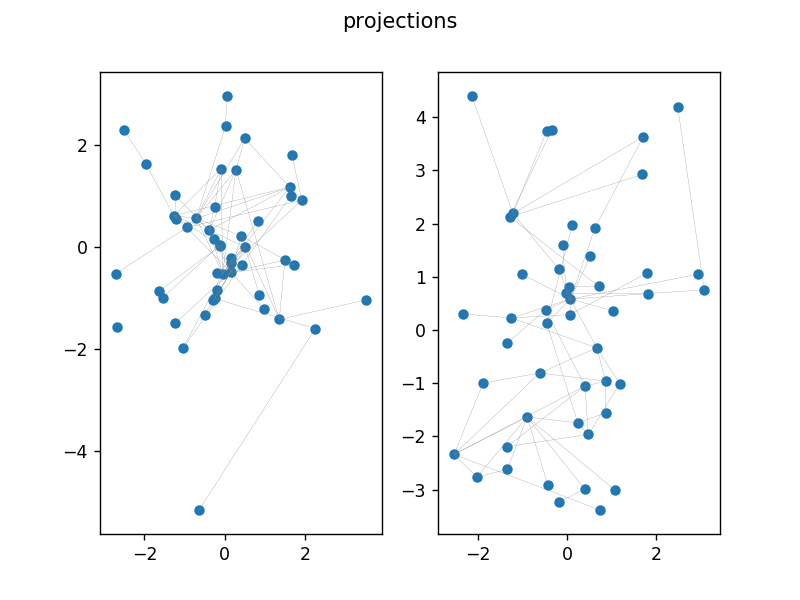

In [16]:
mv.figureH()
mv.figureX()
mv.figureY(include_colors=[marriage_count,loan_count],
          edges=[marriage_edges,loan_edges])